In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]].values

In [4]:
from sklearn.cluster import SpectralClustering

clusmodel = SpectralClustering(n_clusters=5,
        assign_labels='discretize',
        random_state=0).fit(x)
label = clusmodel.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[1.12752940e-14 6.88937641e-07 1.13931012e-06 1.10803465e-06
 7.37216799e-07 1.00245806e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1980 instead with accuracy 
1.9251002889458294e-06.

  _, diffusion_map = lobpcg(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[3.56412850e-15 5.42182120e-07 9.07741256e-07 9.48753309e-07
 7.39557987e-07 8.41299366e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[1.12752940e-14 6.88937641e-07 1.13931012e-06 1.10803465e-06
 7.37216799e-07 1.00245806e-05]
not reaching the requested tolerance 2.980232238

In [5]:
supervised = pd.DataFrame(dataset)
supervised['cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [6]:
# supervised.to_csv("cluster.csv",index=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


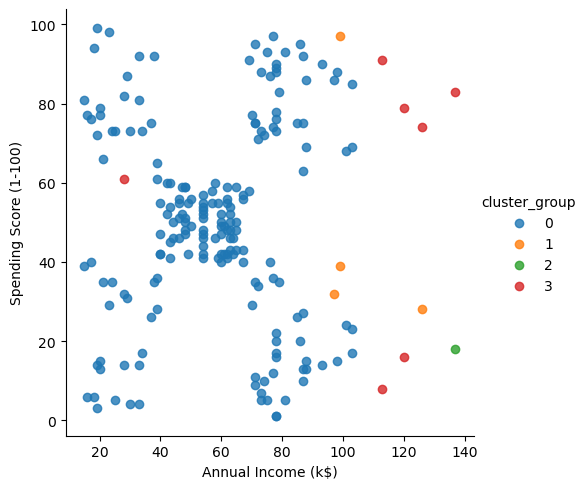

In [7]:
import seaborn as sns

facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)
